# Descripción
   ### Los datos están relacionados con campañas de marketing directo de una institución bancaria. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito a plazo bancario) estaría ('sí') o no ('no') suscrito.


    Reglas y método de evaluación
    
    El desafío consistirá en que cada grupo formado deberá entregar un arreglo con los resultados ('yes' o 'no') y se medirá la medida de desempeño F1 score (macro).
    
    EL archivo de entrega debe ser en formato csv sin indice. Debe ser una sola columna con valores ´yes´ o ´no´ en 5210 filas


#### Variables de entrada:

# datos del cliente bancario:
1 - edad (numérico)

2 - trabajo: tipo de trabajo (categórico: 'admin.', 'Obrero', 'emprendedor', 'empleada doméstica', 'gerencia', 'jubilado', 'autónomo', 'servicios', 'estudiante' , 'técnico', 'desempleado', 'desconocido')

3 - marital: estado civil (categórico: 'divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)

4 - educación (categórica: 'básico.4y', 'básico.6y', 'básico.9y', 'escuela secundaria', 'analfabeto', 'curso.profesional', 'título universitario', 'desconocido')

5 - incumplimiento: ¿tiene crédito en incumplimiento? (categórico: 'no', 'sí', 'desconocido')

6 - vivienda: ¿tiene préstamo para vivienda? (categórico: 'no', 'sí', 'desconocido')

7 - préstamo: ¿tiene préstamo personal? (categórico: 'no', 'sí', 'desconocido')

# relacionado con el último contacto de la campaña actual:

8 - contacto: tipo de comunicación de contacto (categórico: 'celular', 'teléfono')

9 - mes: último mes de contacto del año (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de contacto de la semana (categórico: 'lun', 'tue', 'mié', 'jue', 'vie')

11 - duración: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si duración = 0, entonces y = 'no'). Sin embargo, se desconoce la duración antes de realizar una llamada. Además, después de la finalización de la llamada y, obviamente, se conoce. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

# otros atributos:

12 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye último contacto)

13 - pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)

14 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)

15 - poutcome: resultado de la campaña de marketing anterior (categórico: 'fracaso', 'inexistente', 'éxito')

Variable de salida (objetivo deseado):

21 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: 'sí', 'no')


# Comenzando

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from imblearn.over_sampling import RandomOverSampler
import imblearn

In [2]:
df_train = pd.read_csv('Trainset.csv', index_col= 'Unnamed: 0')
df_test = pd.read_csv('TestFeatures.csv')
final = pd.read_csv('submission_example.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [4]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,46,management,single,tertiary,no,593,yes,no,cellular,29,jan,190,3,-1,0,unknown,no
1,42,admin.,married,tertiary,no,1536,no,no,cellular,6,aug,140,1,182,4,failure,no
2,33,blue-collar,married,secondary,no,370,yes,no,cellular,8,apr,249,1,-1,0,unknown,no
3,29,blue-collar,single,secondary,no,1472,no,no,cellular,18,may,246,2,-1,0,unknown,no
4,29,technician,married,secondary,no,767,yes,no,cellular,5,feb,253,1,-1,0,unknown,no


## Eliminar Columnas
duration   



In [5]:
df_train = df_train.drop(['duration'], axis=1)
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,46,management,single,tertiary,no,593,yes,no,cellular,29,jan,3,-1,0,unknown,no
1,42,admin.,married,tertiary,no,1536,no,no,cellular,6,aug,1,182,4,failure,no
2,33,blue-collar,married,secondary,no,370,yes,no,cellular,8,apr,1,-1,0,unknown,no
3,29,blue-collar,single,secondary,no,1472,no,no,cellular,18,may,2,-1,0,unknown,no
4,29,technician,married,secondary,no,767,yes,no,cellular,5,feb,1,-1,0,unknown,no


## Distribution

In [6]:
df_train['job'].unique()

array(['management', 'admin.', 'blue-collar', 'technician',
       'self-employed', 'housemaid', 'services', 'unemployed', 'retired',
       'student', 'entrepreneur', 'unknown'], dtype=object)

### Mayormente los usuarios NO tiene contratado el producto

In [20]:
df_train.y.value_counts()

no     35347
yes     4653
Name: y, dtype: int64

In [21]:
df_train.y.value_counts()/df_train.shape[0]

no     0.883675
yes    0.116325
Name: y, dtype: float64

# Preproceso de datos Ecoding Test Train

### Copias de los datos.

In [22]:
# Datos sin balanceo
df_prep = df_train.copy()
df_train_oh = df_train.copy()

# Encoding de datos Train

## encoding datos label + replace manual

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_prep['job']=labelencoder.fit_transform(df_prep['job'].values)
df_prep['marital']=labelencoder.fit_transform(df_prep['marital'].values)
df_prep['education']=labelencoder.fit_transform(df_prep['education'].values)
df_prep['contact']=labelencoder.fit_transform(df_prep['contact'].values)
df_prep['poutcome']=labelencoder.fit_transform(df_prep['poutcome'].values)

df_prep['default'].replace(['yes','no'],[1,0],inplace=True)
df_prep['housing'].replace(['yes','no'],[1,0],inplace=True)
df_prep['loan'].replace(['yes','no'],[1,0],inplace=True)
df_prep['y'].replace(['yes','no'],[1,0],inplace=True)
df_prep['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug' , 'sep','oct','nov','dec'],
                         [1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)



#CATEGORICAS ['job','marital','education','contact','month','poutcome']
#NUMERICAS ['age','balance','day','campaign','pdays','previous']
#BINARIAS  ['default','housing','loan']  

In [24]:
df_prep.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,46,4,2,2,0,593,1,0,0,29,1,3,-1,0,3,0
1,42,0,1,2,0,1536,0,0,0,6,8,1,182,4,0,0
2,33,1,1,1,0,370,1,0,0,8,4,1,-1,0,3,0
3,29,1,2,1,0,1472,0,0,0,18,5,2,-1,0,3,0
4,29,9,1,1,0,767,1,0,0,5,2,1,-1,0,3,0


In [26]:
df_prep['y'].unique(),df_prep['y'].value_counts()

(array([0, 1], dtype=int64),
 0    35347
 1     4653
 Name: y, dtype: int64)

## Normalizacion datos Train

In [27]:
# #selecionamos las columnas que normalizaremos
df_norm = df_prep[['age','balance','campaign','pdays','previous','poutcome']]
df_prep2 = df_prep.drop(columns=['age','balance','campaign','pdays','previous','poutcome'])

from sklearn.preprocessing import MinMaxScaler
df_trans = MinMaxScaler()
df_trans = df_trans.fit_transform(df_norm)

df_trans = pd.DataFrame(df_trans)
df_trans.columns = df_norm.columns

df_train_trans = pd.concat([df_trans, df_prep2], axis=1,)
df_train_trans.reindex(columns=['age','job','marital','education','default','balance','housing',
                          'loan','contact','day','month','campaign','pdays','previous','poutcome','y'])

df_train_trans.head()

,age,balance,campaign,pdays,previous,poutcome,job,marital,education,default,housing,loan,contact,day,month,y
0,0.363636,0.078187,0.032258,0.000000,0.000000,1.0,4,2,2,0,1,0,0,29,1,0
1,0.311688,0.086748,0.000000,0.209862,0.014545,0.0,0,1,2,0,0,0,0,6,8,0
2,0.194805,0.076163,0.000000,0.000000,0.000000,1.0,1,1,1,0,1,0,0,8,4,0
3,0.142857,0.086167,0.016129,0.000000,0.000000,1.0,1,2,1,0,0,0,0,18,5,0
4,0.142857,0.079767,0.000000,0.000000,0.000000,1.0,9,1,1,0,1,0,0,5,2,0


<AxesSubplot:>

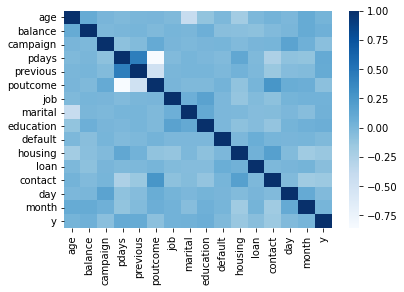

In [28]:
import seaborn as sb
corr = df_train_trans.corr()
sb.heatmap(corr, cmap="Blues", annot=False)

    Aca tenemos un primer dataset con un pre-precoso

## Evaluemos otro preproceso
## encoding onehot + minmax

In [29]:
# One hot encode the categorical variables
lst = ['job','marital','education','contact','month','poutcome','default','housing','loan']
remove = list()
for i in lst:
    if (df_train_oh[i].dtype == np.str or df_train_oh[i].dtype == np.object):
        for j in df_train_oh[i].unique():
            df_train_oh[i+'_'+j] = np.where(df_train_oh[i] == j,1,0)
        remove.append(i)
df_train_oh = df_train_oh.drop(remove, axis=1)
df_train_oh.head()

,age,balance,day,campaign,pdays,previous,y,job_management,job_admin.,job_blue-collar,...,poutcome_unknown,poutcome_failure,poutcome_success,poutcome_other,default_no,default_yes,housing_yes,housing_no,loan_no,loan_yes
0,46,593,29,3,-1,0,no,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,42,1536,6,1,182,4,no,0,1,0,...,0,1,0,0,1,0,0,1,1,0
2,33,370,8,1,-1,0,no,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,29,1472,18,2,-1,0,no,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,29,767,5,1,-1,0,no,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [30]:
df_train_oh['y'].replace(['yes','no'],[1,0],inplace=True)

In [31]:
continuous_vars= ['age','balance','day','campaign','pdays','previous']
# minMax scaling the continuous variables
minVec = df_train_oh[continuous_vars].min().copy()
maxVec = df_train_oh[continuous_vars].max().copy()
df_train_oh[continuous_vars] = (df_train_oh[continuous_vars]-minVec)/(maxVec-minVec)
df_train_oh.head()

,age,balance,day,campaign,pdays,previous,y,job_management,job_admin.,job_blue-collar,...,poutcome_unknown,poutcome_failure,poutcome_success,poutcome_other,default_no,default_yes,housing_yes,housing_no,loan_no,loan_yes
0,0.363636,0.078187,0.933333,0.032258,0.000000,0.000000,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,0.311688,0.086748,0.166667,0.000000,0.209862,0.014545,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
2,0.194805,0.076163,0.233333,0.000000,0.000000,0.000000,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,0.142857,0.086167,0.566667,0.016129,0.000000,0.000000,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,0.142857,0.079767,0.133333,0.000000,0.000000,0.000000,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


<AxesSubplot:>

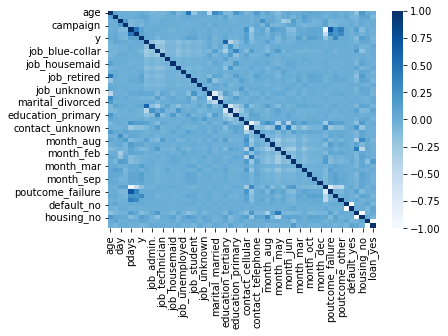

In [32]:
corr = df_train_oh.corr()
sb.heatmap(corr, cmap="Blues", annot=False)

# Preproceso datos TEST

## encoding datos sin balanceo

#### Esto es necesario para poder probar el modelo sobre la misma estructura de datos pre_procesados de train.

In [33]:
test_trans = df_test.copy()
test_trans.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,51,admin.,single,tertiary,no,394,no,no,telephone,28,jan,968,2,-1,0,unknown
1,56,retired,married,secondary,no,334,no,no,cellular,21,jul,101,1,-1,0,unknown
2,50,entrepreneur,married,tertiary,no,52,no,no,cellular,31,jul,22,8,-1,0,unknown
3,54,entrepreneur,married,secondary,no,653,yes,no,unknown,15,may,352,1,-1,0,unknown
4,47,management,married,tertiary,no,0,no,no,cellular,19,aug,213,2,-1,0,unknown


In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
test_trans['job']=labelencoder.fit_transform(test_trans['job'].values)
test_trans['marital']=labelencoder.fit_transform(test_trans['marital'].values)
test_trans['education']=labelencoder.fit_transform(test_trans['education'].values)
test_trans['contact']=labelencoder.fit_transform(test_trans['contact'].values)
test_trans['poutcome']=labelencoder.fit_transform(test_trans['poutcome'].values)

test_trans['default'].replace(['yes','no'],[1,0],inplace=True)
test_trans['housing'].replace(['yes','no'],[1,0],inplace=True)
test_trans['loan'].replace(['yes','no'],[1,0],inplace=True)
test_trans['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug' , 'sep','oct','nov','dec'],
                         [1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

#CATEGORICAS ['job','marital','education','contact','month','poutcome']
#NUMERICAS ['age','balance','day','campaign','pdays','previous']
#BINARIAS  ['default','housing','loan']

In [35]:
test_trans.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,51,0,2,2,0,394,0,0,1,28,1,968,2,-1,0,3
1,56,5,1,1,0,334,0,0,0,21,7,101,1,-1,0,3
2,50,2,1,2,0,52,0,0,0,31,7,22,8,-1,0,3
3,54,2,1,1,0,653,1,0,2,15,5,352,1,-1,0,3
4,47,4,1,2,0,0,0,0,0,19,8,213,2,-1,0,3


## Normalizacion Test

In [36]:
df_norm_test = test_trans[['age','balance','campaign','pdays','previous']]
df_prep_test = test_trans.drop(columns=['age','balance','campaign','pdays','previous','duration'])

from sklearn.preprocessing import MinMaxScaler
test_trans = MinMaxScaler()
test_trans = test_trans.fit_transform(df_norm_test)

test_trans = pd.DataFrame(test_trans)
test_trans.columns = df_norm_test.columns

test_trans = pd.concat([test_trans, df_prep_test], axis=1,)
test_trans.reindex(columns=['age','job','marital','education','balance','housing',
                         'loan','contact','day','month','campaign','pdays','previous','poutcome'])

test_trans.head()

,age,balance,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,0.470588,0.073101,0.023810,0.0,0.0,0,2,2,0,0,0,1,28,1,3
1,0.544118,0.072116,0.000000,0.0,0.0,5,1,1,0,0,0,0,21,7,3
2,0.455882,0.067485,0.166667,0.0,0.0,2,1,2,0,0,0,0,31,7,3
3,0.514706,0.077355,0.000000,0.0,0.0,2,1,1,0,1,0,2,15,5,3
4,0.411765,0.066631,0.023810,0.0,0.0,4,1,2,0,0,0,0,19,8,3


## encoding onehot + minmax TEST

In [37]:
df_test_oh = df_test.copy()

In [38]:
# One hot encode the categorical variables
lst = ['job','marital','education','contact','month','poutcome','default','housing','loan']
remove = list()
for i in lst:
    if (df_test_oh[i].dtype == np.str or df_test_oh[i].dtype == np.object):
        for j in df_test[i].unique():
            df_test_oh[i+'_'+j] = np.where(df_test_oh[i] == j,1,0)
        remove.append(i)
df_test_oh = df_test_oh.drop(remove, axis=1)
df_test_oh.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_retired,job_entrepreneur,...,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,51,394,28,968,2,-1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,56,334,21,101,1,-1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,50,52,31,22,8,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,54,653,15,352,1,-1,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,47,0,19,213,2,-1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [39]:
continuous_vars= ['age','balance','day','campaign','pdays','previous']
# minMax scaling the continuous variables
minVec = df_test_oh[continuous_vars].min().copy()
maxVec = df_test_oh[continuous_vars].max().copy()
df_test_oh[continuous_vars] = (df_test_oh[continuous_vars]-minVec)/(maxVec-minVec)
df_test_oh.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_retired,job_entrepreneur,...,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0.470588,0.073101,0.900000,968,0.023810,0.0,0.0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,0.544118,0.072116,0.666667,101,0.000000,0.0,0.0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,0.455882,0.067485,1.000000,22,0.166667,0.0,0.0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,0.514706,0.077355,0.466667,352,0.000000,0.0,0.0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,0.411765,0.066631,0.600000,213,0.023810,0.0,0.0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


# BALANCEO DE DATOS

# Oversampling
## Para ambos datos pre-procesados

    df_train_trans()
    df_train_oh.head()
    

In [40]:
#Separamos el set de datos
x = df_train_trans.drop(['y'], axis=1)
y = df_train_trans['y']

In [62]:
random_over = RandomOverSampler(sampling_strategy=0.44,
                               random_state=123)

X_over,y_over = random_over.fit_resample(x,y)
df_over = X_over
df_over['y'] = y_over

print(df_over.y.value_counts()/df_over.shape[0])
print(df_over.y.value_counts())
print(df_over.shape)
df_over.head()

0    0.694454
1    0.305546
Name: y, dtype: float64
0    35347
1    15552
Name: y, dtype: int64
(50899, 16)


,age,balance,campaign,pdays,previous,poutcome,job,marital,education,default,housing,loan,contact,day,month,y
0,0.363636,0.078187,0.032258,0.000000,0.000000,1.0,4,2,2,0,1,0,0,29,1,0
1,0.311688,0.086748,0.000000,0.209862,0.014545,0.0,0,1,2,0,0,0,0,6,8,0
2,0.194805,0.076163,0.000000,0.000000,0.000000,1.0,1,1,1,0,1,0,0,8,4,0
3,0.142857,0.086167,0.016129,0.000000,0.000000,1.0,1,2,1,0,0,0,0,18,5,0
4,0.142857,0.079767,0.000000,0.000000,0.000000,1.0,9,1,1,0,1,0,0,5,2,0


## Sampling - oh.minmax

In [42]:
#Separamos el set de datos
x_o = df_train_oh.drop(['y'], axis=1)
y_o = df_train_oh['y']

In [61]:
random_over = RandomOverSampler(sampling_strategy= 0.44,
                               random_state=123)
X_over,y_over = random_over.fit_resample(x_o,y_o)
df_over_oh = X_over
df_over_oh['y'] = y_over

print(df_over_oh.y.value_counts()/df_over_oh.shape[0])
print(df_over_oh.y.value_counts())
print(df_over_oh.shape)
df_over_oh.head()

0    0.694454
1    0.305546
Name: y, dtype: float64
0    35347
1    15552
Name: y, dtype: int64
(50899, 51)


,age,balance,day,campaign,pdays,previous,job_management,job_admin.,job_blue-collar,job_technician,...,poutcome_failure,poutcome_success,poutcome_other,default_no,default_yes,housing_yes,housing_no,loan_no,loan_yes,y
0,0.363636,0.078187,0.933333,0.032258,0.000000,0.000000,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0.311688,0.086748,0.166667,0.000000,0.209862,0.014545,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
2,0.194805,0.076163,0.233333,0.000000,0.000000,0.000000,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,0.142857,0.086167,0.566667,0.016129,0.000000,0.000000,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
4,0.142857,0.079767,0.133333,0.000000,0.000000,0.000000,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


#### Tenemos dos set de datos Balanceados en dos formas diferentes

# Ejecutando Modelos 

In [63]:
df_ov = df_over.copy()
df_ov_oh = df_over_oh.copy()

In [65]:
from pycaret.classification import *
clf1 = setup(data = df_ov,
             target = 'y',
             train_size=0.2,
             session_id=123,
             ignore_low_variance = True
            )

best_model_1 = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8517,0.8689,0.6717,0.7967,0.7284,0.6274,0.6321,0.5070
et,Extra Trees Classifier,0.8445,0.8715,0.6681,0.7767,0.7180,0.6115,0.6150,0.4940
xgboost,Extreme Gradient Boosting,0.8122,0.8314,0.5624,0.7426,0.6396,0.5159,0.5253,0.6230
dt,Decision Tree Classifier,0.7684,0.7416,0.6757,0.5971,0.6336,0.4653,0.4676,0.0350
catboost,CatBoost Classifier,0.8092,0.8247,0.5207,0.7617,0.6180,0.4968,0.5131,2.1620
lightgbm,Light Gradient Boosting Machine,0.8070,0.8239,0.5207,0.7533,0.6152,0.4921,0.5074,0.1540
gbc,Gradient Boosting Classifier,0.7900,0.7927,0.4372,0.7504,0.5522,0.4273,0.4541,0.4860
knn,K Neighbors Classifier,0.7511,0.7605,0.4518,0.6081,0.5183,0.3554,0.3626,0.0870
ada,Ada Boost Classifier,0.7778,0.7742,0.3991,0.7286,0.5153,0.3869,0.4166,0.1820
qda,Quadratic Discriminant Analysis,0.7464,0.7212,0.3657,0.6279,0.4601,0.3095,0.3298,0.0190


In [92]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9402,0.9656,0.9108,0.8952,0.9030,0.8598,0.8598
1,0.9422,0.9728,0.9256,0.8896,0.9072,0.8652,0.8656
2,0.9369,0.9639,0.9062,0.8891,0.8976,0.8519,0.8520
3,0.9383,0.9721,0.9301,0.8754,0.9020,0.8570,0.8578
4,0.9509,0.9718,0.9384,0.9043,0.9211,0.8854,0.8858
5,0.9470,0.9737,0.9292,0.9003,0.9145,0.8761,0.8763
6,0.9464,0.9701,0.9210,0.9052,0.9131,0.8743,0.8744
7,0.9441,0.9706,0.9229,0.8973,0.9099,0.8695,0.8696
8,0.9377,0.9664,0.9229,0.8793,0.9005,0.8552,0.8557
9,0.9391,0.9677,0.9164,0.8878,0.9019,0.8577,0.8579


In [ ]:
# plot_model(rf, plot = 'feature')

In [67]:
from pycaret.classification import *
clf2 = setup(data = df_ov_oh,
             target = 'y',
             train_size=0.2,
             session_id=123,
             ignore_low_variance = True
            )

best_model_2 = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8487,0.8641,0.6499,0.8025,0.7179,0.6161,0.6227,0.4930
et,Extra Trees Classifier,0.8361,0.8579,0.6565,0.7587,0.7038,0.5913,0.5944,0.5700
xgboost,Extreme Gradient Boosting,0.8116,0.8319,0.5624,0.7409,0.6389,0.5147,0.5240,0.7210
dt,Decision Tree Classifier,0.7601,0.7370,0.6804,0.5821,0.6272,0.4520,0.4552,0.0570
catboost,CatBoost Classifier,0.8050,0.8251,0.5071,0.7554,0.6065,0.4835,0.5007,2.4980
lightgbm,Light Gradient Boosting Machine,0.8032,0.8225,0.5074,0.7489,0.6044,0.4799,0.4963,0.1650
qda,Quadratic Discriminant Analysis,0.7250,0.7422,0.5816,0.5430,0.5571,0.3600,0.3636,0.0340
knn,K Neighbors Classifier,0.7518,0.7693,0.4995,0.5980,0.5442,0.3756,0.3786,0.3070
gbc,Gradient Boosting Classifier,0.7839,0.7928,0.4130,0.7441,0.5310,0.4053,0.4350,0.5770
nb,Naive Bayes,0.7097,0.7299,0.5329,0.5106,0.5212,0.3131,0.3135,0.0330


In [68]:
rf_ov = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8654,0.8709,0.6921,0.8261,0.7532,0.6616,0.6665
1,0.8448,0.8724,0.6523,0.7880,0.7138,0.6086,0.6137
2,0.8546,0.8594,0.6556,0.8182,0.7279,0.6304,0.6376
3,0.8212,0.8499,0.5828,0.7586,0.6592,0.5408,0.5494
4,0.8595,0.8709,0.6689,0.8245,0.7386,0.6440,0.6505
5,0.8448,0.8608,0.6159,0.8158,0.7019,0.5997,0.6105
6,0.8605,0.8756,0.6821,0.8175,0.7437,0.6489,0.6540
7,0.8527,0.8715,0.6821,0.7923,0.7331,0.6321,0.6355
8,0.8350,0.8430,0.6391,0.7659,0.6968,0.5847,0.5892
9,0.8486,0.8665,0.6279,0.8182,0.7105,0.6104,0.6202


    En general el modelo en los datos over con metodo Onehot tiene un mejor resultado que el modelo prerocesado de manera manual.

# Optimizando Hiperparametros
### por F1

In [69]:
tuned_rf = tune_model(rf, n_iter = 50,optimize ='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7240,0.7782,0.6457,0.5285,0.5812,0.3784,0.3826
1,0.7583,0.7955,0.6987,0.5765,0.6317,0.4544,0.4590
2,0.7613,0.8028,0.6788,0.5840,0.6279,0.4536,0.4564
3,0.7367,0.7796,0.6722,0.5457,0.6024,0.4088,0.4137
4,0.7583,0.7921,0.6623,0.5814,0.6192,0.4433,0.4453
5,0.7436,0.7509,0.6192,0.5616,0.5890,0.4033,0.4043
6,0.7132,0.7618,0.6391,0.5133,0.5693,0.3581,0.3630
7,0.7358,0.7752,0.6457,0.5462,0.5918,0.3985,0.4015
8,0.7161,0.7519,0.6060,0.5184,0.5588,0.3514,0.3537
9,0.7266,0.7605,0.6146,0.5331,0.5710,0.3719,0.3739


In [70]:
tuned_re_ov = tune_model(rf_ov, n_iter = 50,optimize ='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7240,0.7782,0.6457,0.5285,0.5812,0.3784,0.3826
1,0.7583,0.7955,0.6987,0.5765,0.6317,0.4544,0.4590
2,0.7613,0.8028,0.6788,0.5840,0.6279,0.4536,0.4564
3,0.7367,0.7796,0.6722,0.5457,0.6024,0.4088,0.4137
4,0.7583,0.7921,0.6623,0.5814,0.6192,0.4433,0.4453
5,0.7436,0.7509,0.6192,0.5616,0.5890,0.4033,0.4043
6,0.7132,0.7618,0.6391,0.5133,0.5693,0.3581,0.3630
7,0.7358,0.7752,0.6457,0.5462,0.5918,0.3985,0.4015
8,0.7161,0.7519,0.6060,0.5184,0.5588,0.3514,0.3537
9,0.7266,0.7605,0.6146,0.5331,0.5710,0.3719,0.3739


In [ ]:
# print(tuned_rf)

# Ensamble

In [71]:
# # entrenar un clasificador de ensacado en dt
bagged_dt = ensemble_model ( rf, method = 'Bagging' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8507,0.8635,0.6391,0.8178,0.7175,0.6181,0.6267
1,0.8310,0.8781,0.6026,0.7778,0.6791,0.5669,0.5754
2,0.8477,0.8623,0.6258,0.8182,0.7092,0.6085,0.6186
3,0.8232,0.8483,0.5662,0.7773,0.6552,0.5402,0.5524
4,0.8536,0.8705,0.6358,0.8312,0.7205,0.6237,0.6340
5,0.8202,0.8516,0.5464,0.7820,0.6433,0.5281,0.5433
6,0.8379,0.8692,0.5960,0.8072,0.6857,0.5798,0.5919
7,0.8448,0.8695,0.6291,0.8051,0.7063,0.6030,0.6115
8,0.8212,0.8343,0.5695,0.7679,0.6540,0.5370,0.5479
9,0.8417,0.8595,0.5947,0.8211,0.6898,0.5871,0.6009


In [73]:
# # entrenar un clasificador adaboost en dt con 100 estimadores
boosted_dt = ensemble_model ( rf, method = 'Boosting' , n_estimators = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8556,0.8655,0.6755,0.8063,0.7351,0.6369,0.6417
1,0.8458,0.8804,0.6623,0.7843,0.7181,0.6130,0.6172
2,0.8595,0.8644,0.6689,0.8245,0.7386,0.6440,0.6505
3,0.8330,0.8555,0.5993,0.7870,0.6805,0.5702,0.5799
4,0.8635,0.8729,0.6689,0.8382,0.7440,0.6525,0.6602
5,0.8448,0.8633,0.6225,0.8103,0.7041,0.6014,0.6110
6,0.8654,0.8783,0.6887,0.8287,0.7523,0.6610,0.6663
7,0.8546,0.8768,0.6689,0.8080,0.7319,0.6334,0.6387
8,0.8379,0.8480,0.6457,0.7708,0.7027,0.5925,0.5969
9,0.8466,0.8629,0.6445,0.7984,0.7132,0.6102,0.6167


# Modelo en Blender Top3

In [ ]:
from pycaret.classification import *
clf3 = setup(data = df_over_oh,
             target = 'y',
             train_size=0.3,
             session_id=123,
             ignore_low_variance = True
            )

top3 = compare_models(n_select = 3)
blender = blend_models(top3)

### F1 por que usamos esta metrica
    Precision nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
    
    Recall nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
    
    F1 combina Precision y Recall en una sola medida
    
    La Matriz de Confusión indica qué tipos de errores se cometen

## Stacker

In [75]:
exp_name = setup(data = df_over,  target = 'y')
top3 = compare_models(n_select = 3)
stacker = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9534,0.9684,0.8952,0.9493,0.9215,0.8884,0.8892
1,0.9520,0.9742,0.9053,0.9354,0.9201,0.8858,0.8861
2,0.9447,0.9683,0.8906,0.9255,0.9077,0.8683,0.8686
3,0.9506,0.9751,0.9099,0.9270,0.9184,0.8830,0.8830
4,0.9573,0.9756,0.9182,0.9407,0.9293,0.8988,0.8989
5,0.9534,0.9744,0.9108,0.9349,0.9227,0.8894,0.8895
6,0.9543,0.9711,0.9008,0.9469,0.9233,0.8907,0.8913
7,0.9520,0.9717,0.9027,0.9380,0.9200,0.8857,0.8861
8,0.9481,0.9677,0.9109,0.9185,0.9147,0.8774,0.8774
9,0.9526,0.9704,0.9081,0.9347,0.9212,0.8873,0.8875


In [76]:
calibrated_dt = calibrate_model (stacker)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9534,0.9693,0.8971,0.9476,0.9216,0.8885,0.8892
1,0.9500,0.9735,0.9081,0.9268,0.9174,0.8816,0.8817
2,0.9436,0.9680,0.8925,0.9204,0.9062,0.8659,0.8661
3,0.9500,0.9747,0.9118,0.9236,0.9177,0.8818,0.8819
4,0.9582,0.9758,0.9246,0.9376,0.9311,0.9010,0.9011
5,0.9543,0.9746,0.9127,0.9359,0.9242,0.8914,0.8916
6,0.9543,0.9700,0.9036,0.9443,0.9235,0.8909,0.8913
7,0.9531,0.9714,0.9073,0.9374,0.9221,0.8886,0.8888
8,0.9467,0.9661,0.9118,0.9135,0.9127,0.8743,0.8743
9,0.9526,0.9700,0.9081,0.9347,0.9212,0.8873,0.8875


In [77]:
X_train = get_config('X_train')

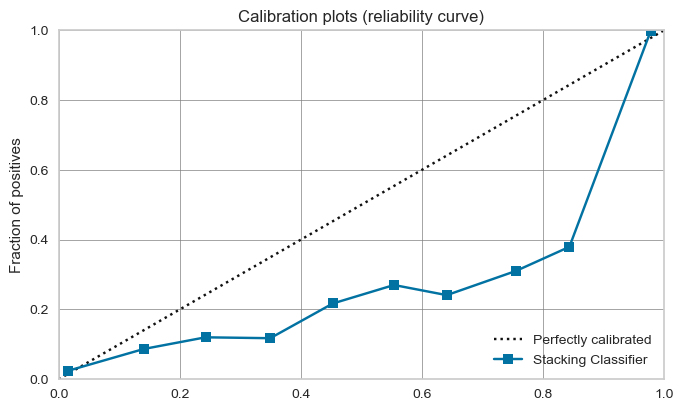

In [79]:
plot_model(stacker, plot = 'calibration')

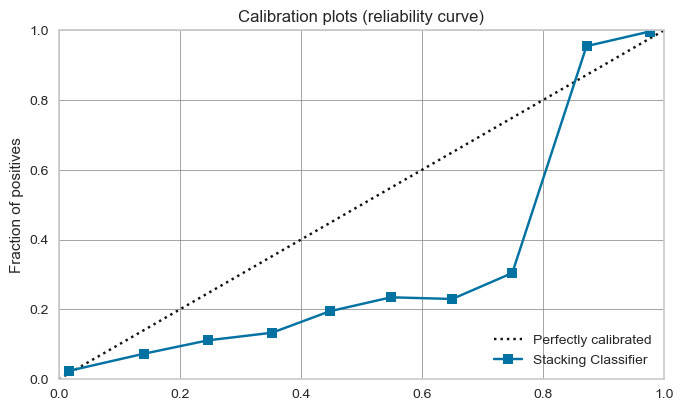

In [80]:
plot_model(calibrated_dt, plot = 'calibration')

## Auto_Mod

In [ ]:
# auto_mod = setup(data = df_over,  target = 'y')
# top3 = compare_models(n_select = 2)
# tuned_top3 = [tune_model(i) for i in top3]
# blender = blend_models(tuned_top3)
# stacker = stack_models(tuned_top3)
# best_f1_model = automl(optimize = 'F1')

# Prediccion

In [87]:
predict_model(calibrated_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9595,0.9798,0.9283,0.9387,0.9334,0.9044,0.9044


In [88]:
predict_model(stacker);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9604,0.9788,0.9261,0.9433,0.9346,0.9062,0.9063


In [93]:
predict_model(rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9476,0.9782,0.9362,0.8970,0.9162,0.8781,0.8785


In [105]:
rf_final = finalize_model(stacker)
#Parámetros finales del modelo Random Forest para su despliegue a producción
print(rf_final)

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=2056, shuffle=False),
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
  

    Al utilizar pycaret no es recomendable utilizar el predict luego de finalizar, dado que estariamos intentando predecir los mismo datos que entrenamos.

# Testeando resultados.

    test_trans
    df_over_oh

In [106]:
test_predictions = predict_model(rf, data = test_trans)
test_predictions.head()

,age,balance,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,day,month,poutcome,Label,Score
0,0.470588,0.073101,0.023810,0.0,0.0,0,2,2,0,0,0,1,28,1,3,0,0.96
1,0.544118,0.072116,0.000000,0.0,0.0,5,1,1,0,0,0,0,21,7,3,0,0.91
2,0.455882,0.067485,0.166667,0.0,0.0,2,1,2,0,0,0,0,31,7,3,0,0.68
3,0.514706,0.077355,0.000000,0.0,0.0,2,1,1,0,1,0,2,15,5,3,0,0.95
4,0.411765,0.066631,0.023810,0.0,0.0,4,1,2,0,0,0,0,19,8,3,0,0.96


In [104]:
test_trans.head()

,age,balance,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,0.470588,0.073101,0.023810,0.0,0.0,0,2,2,0,0,0,1,28,1,3
1,0.544118,0.072116,0.000000,0.0,0.0,5,1,1,0,0,0,0,21,7,3
2,0.455882,0.067485,0.166667,0.0,0.0,2,1,2,0,0,0,0,31,7,3
3,0.514706,0.077355,0.000000,0.0,0.0,2,1,1,0,1,0,2,15,5,3
4,0.411765,0.066631,0.023810,0.0,0.0,4,1,2,0,0,0,0,19,8,3


# Resultado

In [1]:
from pycaret.utils import check_metric
check_metric(test_predictions['default'], test_predictions['Label'])

NameError: name 'test_predictions' is not defined

# Guardando datos para carga

In [ ]:
test_predictions['Label'].replace([1,0],['yes','no'],inplace=True)

In [ ]:
label = test_predictions[['Label']]

In [ ]:
label.to_csv('example_ultimoy.csv',index=False , header = False )